In [7]:
import imp  
import ocean_grid_generator as ogg
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np

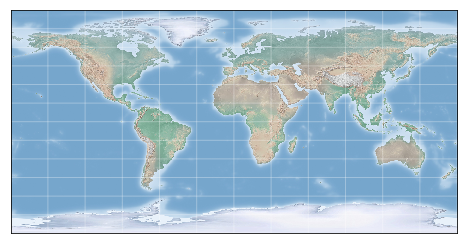

In [11]:
from mpl_toolkits.basemap import Basemap

from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
        
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

draw_map(m)

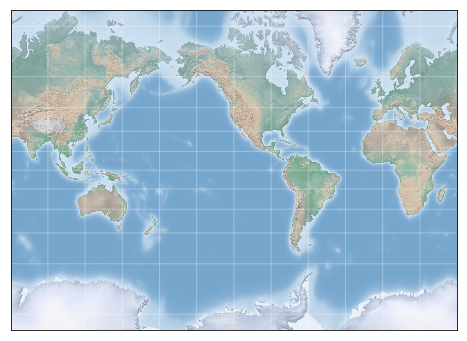

In [12]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
merc = Basemap(projection='merc', resolution=None,
            llcrnrlat=-78, urcrnrlat=78,
            llcrnrlon=60, urcrnrlon=420, )

draw_map(merc)

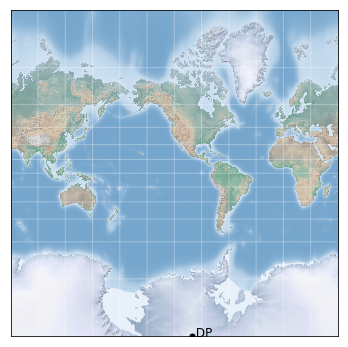

In [13]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
merc = Basemap(projection='merc', resolution=None,
            llcrnrlat=-85, urcrnrlat=85,
            llcrnrlon=60, urcrnrlon=420, )

draw_map(merc)

# Map (long, lat) to (x, y) for plotting
x, y = merc(260, -85)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' DP', fontsize=12);

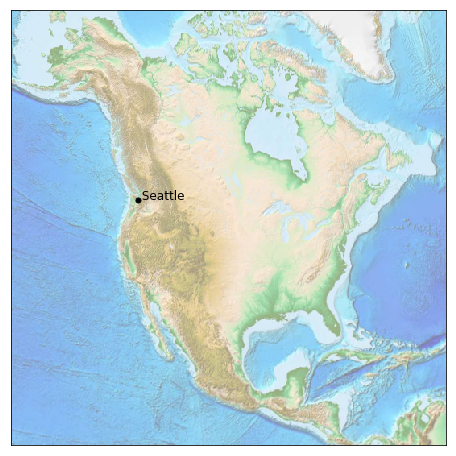

In [5]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [2]:
import numpy as np
import netCDF4 as nc
dataset = nc.Dataset('/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p125_IAF_csf_JRA55do1-3_r5_cycle4/gfdl.ncrc4-intel16f2-prod/pp/ocean_daily/ts/daily/5yr/ocean_daily.19630101-19671231.tos.nc')
#for var in dataset.variables: print(var,end=' ')
# average_DT average_T1 average_T2 nv time time_bnds tos xh yh   

In [29]:
tos = dataset.variables['tos']
#tos.shape (1826, 2240, 2880) 
time = dataset.variables['time']
#print(nc.num2date(time[0],time.units))
#print(nc.num2date(time[-1],time.units))
#print(nc.num2date(time[1442],time.units))
#1963-01-01 12:00:00
#1967-12-31 12:00:00
#1966-12-13 12:00:00
tos = tos[1442,:,:]

In [30]:
ocean_static = nc.Dataset('/ptmp/oar.gfdl.ogrp-account/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p125_IAF_csf_JRA55do1-3_r5_cycle4/gfdl.ncrc4-intel16f2-prod/history/ocean_static_no_mask_table.nc')
#for var in ocean_static.variables: print(var,end=' ')
# xh yh time xq yq areacello deptho hfgeou sftof Coriolis geolon geolat geolon_c geolat_c geolon_u geolat_u geolon_v geolat_v wet wet_c wet_u wet_v dxt dyt dxCu dyCu dxCv dyCv areacello_cu areacello_cv areacello_bu basin   

geolon = np.array(ocean_static.variables['geolon'])
geolat = np.array(ocean_static.variables['geolat'])
#print(geolon.shape,geolat.shape)
#(2240, 2880) (2240, 2880)

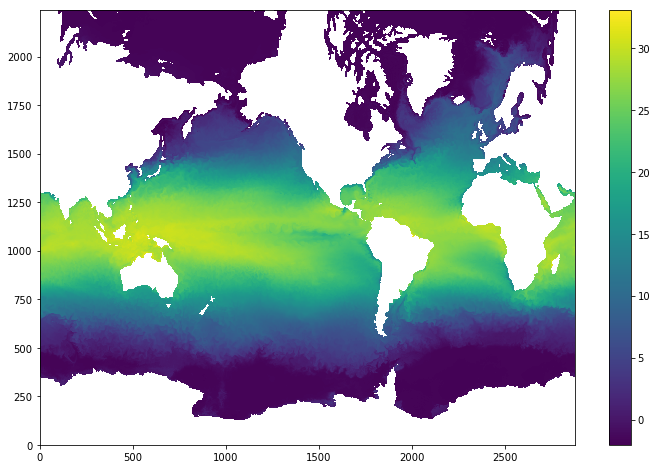

In [32]:
plt.figure(figsize=(12,8))
plt.pcolormesh(tos); plt.colorbar()

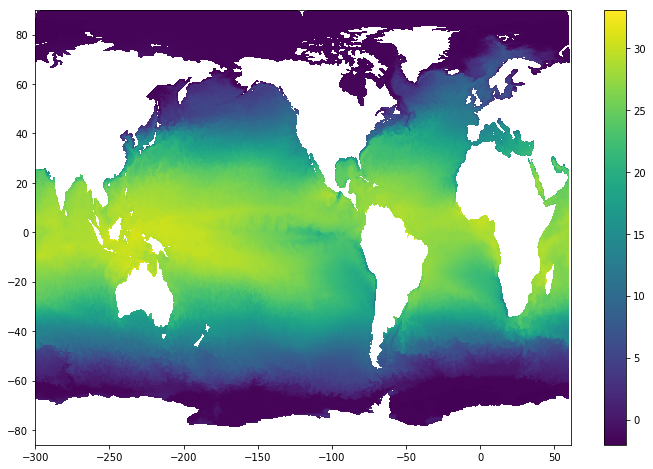

In [33]:
plt.figure(figsize=(12,8))
plt.pcolormesh(geolon,geolat,tos); plt.colorbar()

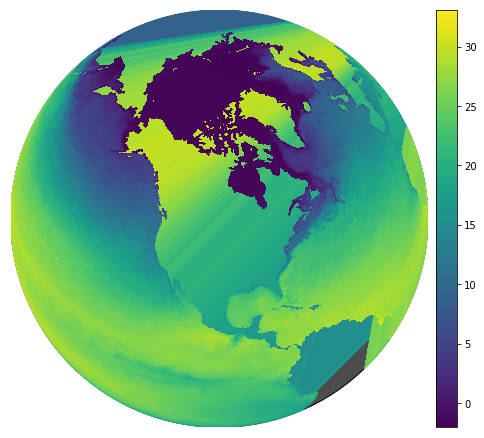

In [53]:
map1 = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
x1,y1 = map1(geolon,geolat)
plt.figure(figsize=(8, 8))
#map1.drawmapboundary(fill_color='0.3')
map1.pcolormesh(x1,y1,tos); map1.colorbar();

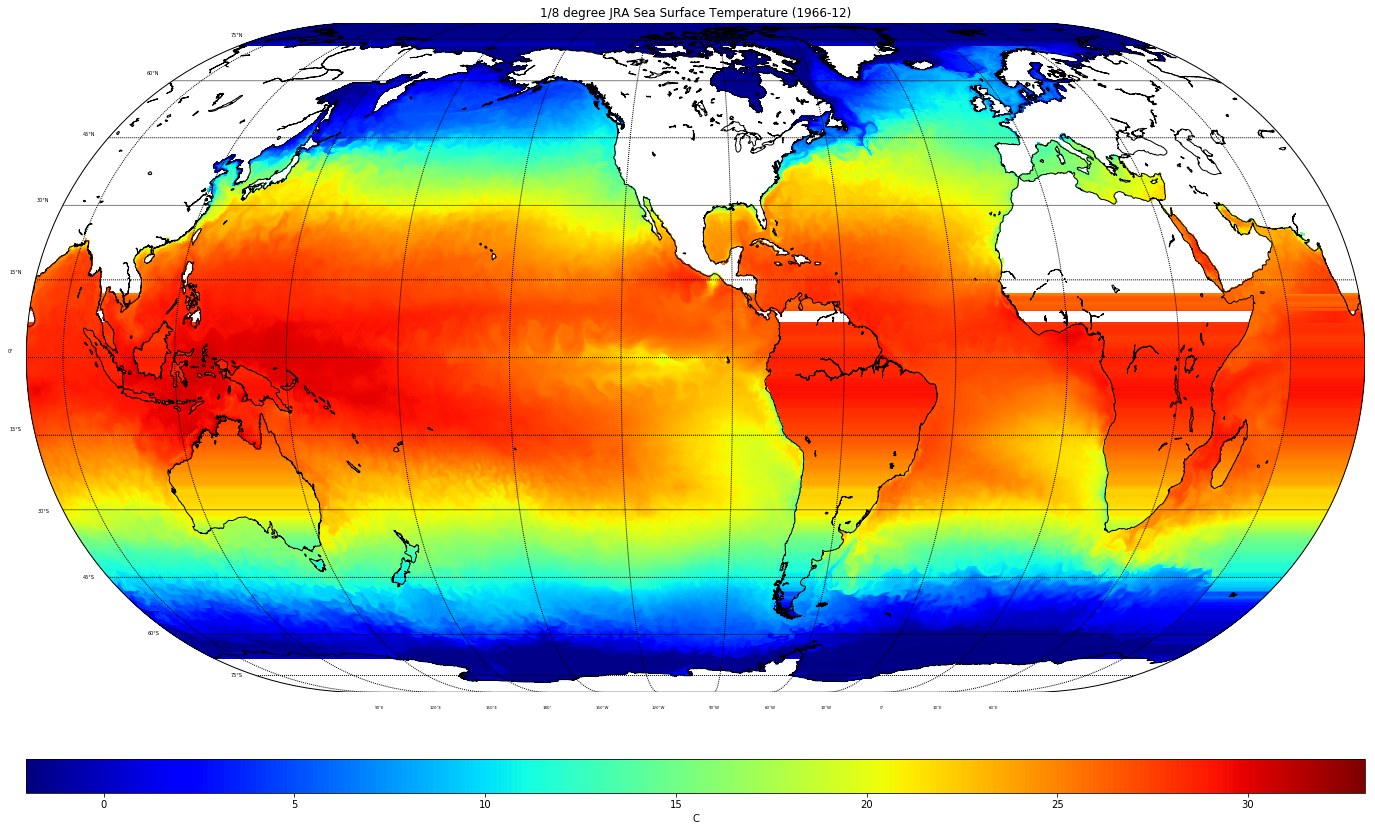

In [46]:
plt.figure(figsize=(24,16))

import matplotlib.cm as cm
map2 = Basemap(resolution='l', projection='eck4', lat_0=0, lon_0=-100)
x2,y2 = map2(geolon,geolat)

cs = map2.pcolor(x2,y2,np.squeeze(tos),  cmap=cm.jet)
cs.set_edgecolor('face')

# Add Grid Lines
map2.drawparallels(np.arange(-90., 90., 15.), labels=[1,0,0,0], fontsize=5)
map2.drawmeridians(np.arange(-180., 180., 30.), labels=[0,0,0,1], fontsize=4)

# Add Coastlines, States, and Country Boundaries
map2.drawcoastlines()
#map2.drawstates()
#map2.drawcountries()
# Add Colorbar
cbar = map2.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('C')
cbar.ax.tick_params(labelsize=10)

# Add Title
plt.title('1/8 degree JRA Sea Surface Temperature (1966-12)')

plt.savefig('SST_TEST.pdf', format='pdf', dpi=360)

In [49]:
tos_sq = dataset.variables['tos'][0,:].squeeze()

In [50]:
tos_sq.shape

(2240, 2880)

(2240, 2880)